In [1]:
import os.path
from importlib import reload 

import matplotlib.pyplot as  plt
import numpy as np 
import cv2

import glob 

# our own utility functions
import  util as u 
import  lane_finding as p 

VIDEOS_DIR = r"C:\_DATA\autonomous-driving-nd\Adv_Lane_finding\\"


### Camera calibration

We first load a distorted image

img_filename = ./camera_cal\calibration1.jpg ret=False len(corners)=0 len(imgpoints)=0
img_filename = ./camera_cal\calibration10.jpg ret=True len(corners)=54 len(imgpoints)=1
img_filename = ./camera_cal\calibration11.jpg ret=True len(corners)=54 len(imgpoints)=2
img_filename = ./camera_cal\calibration12.jpg ret=True len(corners)=54 len(imgpoints)=3
img_filename = ./camera_cal\calibration13.jpg ret=True len(corners)=54 len(imgpoints)=4
img_filename = ./camera_cal\calibration14.jpg ret=True len(corners)=54 len(imgpoints)=5
img_filename = ./camera_cal\calibration15.jpg ret=True len(corners)=54 len(imgpoints)=6
img_filename = ./camera_cal\calibration16.jpg ret=True len(corners)=54 len(imgpoints)=7
img_filename = ./camera_cal\calibration17.jpg ret=True len(corners)=54 len(imgpoints)=8
img_filename = ./camera_cal\calibration18.jpg ret=True len(corners)=54 len(imgpoints)=9
img_filename = ./camera_cal\calibration19.jpg ret=True len(corners)=54 len(imgpoints)=10
img_filename = ./camera_cal\cali

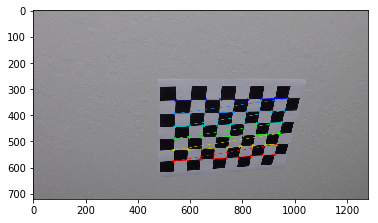

In [2]:
nx = 9 
ny = 6

img_filenames = glob.glob("./camera_cal/calibration*.jpg") 

mtx, dist = p.calibrate_cam( img_filenames, n_x=nx, n_y=ny, draw=1)

In [3]:
mtx, dist

(array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.24688507, -0.02373155, -0.00109831,  0.00035107, -0.00259868]]))

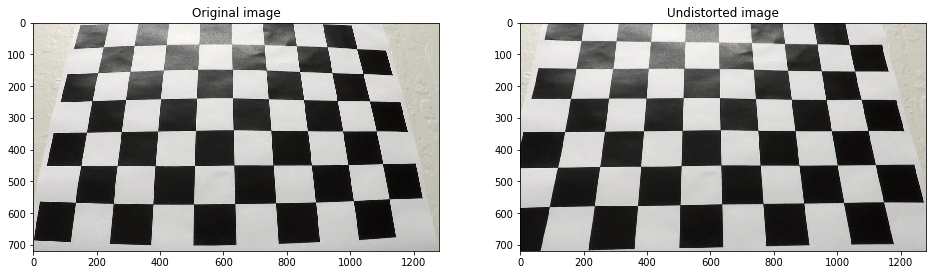

In [4]:
#help( plt.figure )
chessboard = u.rgb_read( './camera_cal/calibration3.jpg' )
undist_chess = cv2.undistort(chessboard, mtx, dist, None, mtx)

fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(16,6) )
ax1.set_title( 'Original image')
ax1.imshow( chessboard )
ax2.set_title( 'Undistorted image')
ax2.imshow( undist_chess )

## Pipeline (test images) 

### Undistorting images 

In [5]:
test_img_fns = glob.glob( './test_images/*.jpg' ) 

In [6]:
def undistort_many( test_img_fns ) :
    for img_fn in test_img_fns : 
        distorted = u.rgb_read( img_fn )
        undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)    
        name_noext, _ = os.path.splitext( os.path.basename( img_fn )) 
        out_fn =  'output_images/' + name_noext + '_undistorted.jpg'
        print( "Writing " + out_fn ) 
        cv2.imwrite( out_fn , u.bgr2rgb( undistorted ) )

undistort_many( test_img_fns )

Writing output_images/straight_lines1_undistorted.jpg
Writing output_images/straight_lines2_undistorted.jpg
Writing output_images/test1_undistorted.jpg
Writing output_images/test2_undistorted.jpg
Writing output_images/test3_undistorted.jpg
Writing output_images/test4_undistorted.jpg
Writing output_images/test5_undistorted.jpg
Writing output_images/test6_undistorted.jpg


img.shape=(720, 1280, 3) img.max()=255
img.shape=(720, 1280, 3) img.max()=255


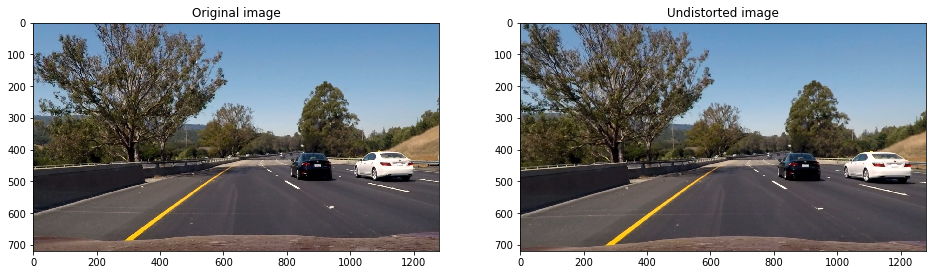

In [7]:
u.show2( u.rgb_read('test_images/test6.jpg'), 
         u.rgb_read('output_images/test6_undistorted.jpg'),
         title1='Original image', 
         title2='Undistorted image' )

### Finding lane pixels

img.shape=(720, 1280) img.max()=True


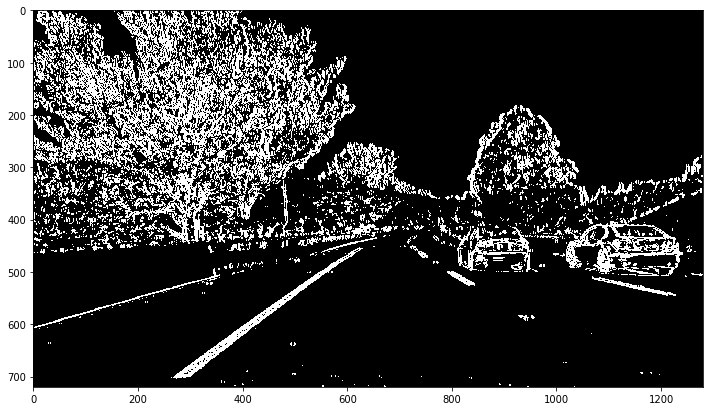

In [8]:
undistorted_t6 = u.rgb_read('output_images/test6_undistorted.jpg') 
binary_t6 = p.get_lane_pixels_0( undistorted_t6 )
u.show( binary_t6, cmap='gray')

### Performing the perspective transform 

img.shape=(720, 1280, 3) img.max()=255
img.shape=(720, 1280, 3) img.max()=255


array([[-6.93207296e-01, -1.53511483e+00,  1.08426589e+03],
       [-5.66213743e-15, -2.00711992e+00,  9.22763134e+02],
       [-7.58941521e-18, -2.39653396e-03,  1.00000000e+00]])

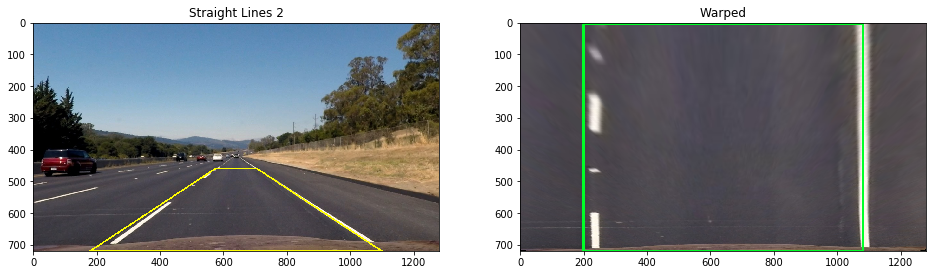

In [9]:
reload( p )

def test_persp_transform( fname ) :
    distorted = u.rgb_read( fname )
    undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)

    imgc = undistorted.copy()
    corners = p.construct_trapezoid( imgc, 
                                     top_offset = 100, 
                                     alpha_top = 0.37, 
                                     alpha_bottom=0.72 )

    p.draw_four_corners( imgc, corners )

    M, dst_points = p.get_perspective_transform( imgc, corners, offset_x=200 )

    warped = p.warp_perspective(undistorted,  M )

    p.draw_four_corners( warped, dst_points, color=(0,255, 40), tkn=5 )

    u.show2( imgc, warped,
             title1='Straight Lines 2',
             title2='Warped' )
    
    return M

M = test_persp_transform( "test_images/straight_lines2.jpg" ) 
M

img.shape=(720, 1280, 3) img.max()=255
img.shape=(720, 1280, 3) img.max()=255


array([[-6.93207296e-01, -1.53511483e+00,  1.08426589e+03],
       [-5.66213743e-15, -2.00711992e+00,  9.22763134e+02],
       [-7.58941521e-18, -2.39653396e-03,  1.00000000e+00]])

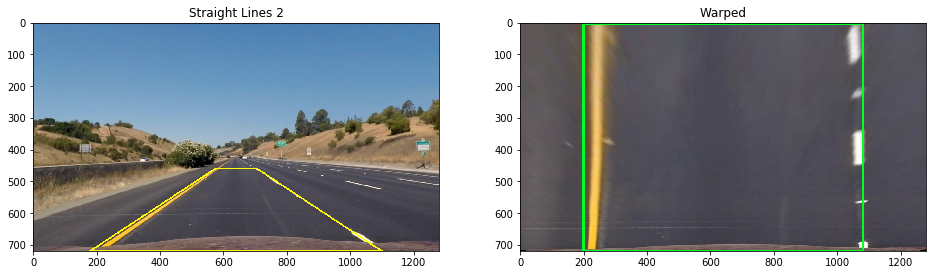

In [25]:
M = test_persp_transform( "test_images/straight_lines1.jpg" ) 
M

warped:  (720, 1280) uint8
img.shape=(720, 1280, 3) img.max()=255


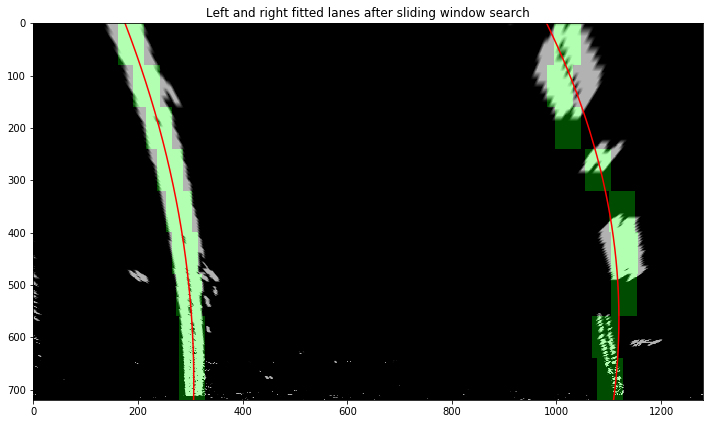

In [13]:
reload( u )
reload( p )
window_width  = 50
window_height = 80
margin = 100

def test_window_search( fname, persp_m ) : 

    distorted = u.rgb_read( fname )
    warped, undistorted,  lane_pixels = p.get_lane_pixels_bgr( distorted, mtx, dist, persp_m )
    
    bin_gray = u.binary2gray( lane_pixels  )
    warped = p.warp_perspective( bin_gray, persp_m )
    
    print( "warped: ",  warped.shape, warped.dtype )
        
    ( window_centroids, 
      left_lane, right_lane ) = p.sliding_window_search(warped, window_width,
                                                        window_height, margin)

    
    left_fit, right_fit = p.fit_polys0( left_lane, right_lane )
    
    out = p.show_window_search_results( warped, window_centroids,
                                        window_width, window_height )     
    ax = u.show(out, title= 'Left and right fitted lanes after sliding window search')
    y_s = np.arange( 0, out.shape[0] ) 
    ax.plot( np.polyval(left_fit, y_s),  y_s, 'r')
    
    ax.plot( np.polyval(right_fit, y_s),  y_s, 'r')
    
    #ax.plt( )
    return ax
    
test_window_search( './test_images/test2.jpg', M )

img.shape=(720, 1280, 3) img.max()=255


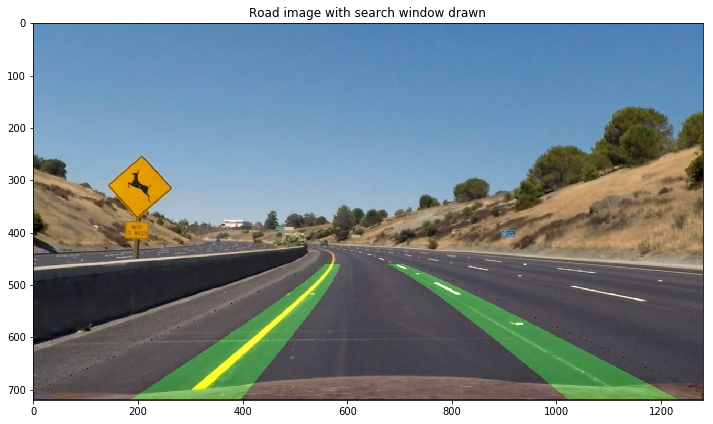

In [101]:
reload( p )
reload( u )

params = {
    "cam_mtx" : mtx, 
    "cam_dist" : dist, 
    "persp_M"  : M,
    "persp_M_inv"   : np.linalg.inv( M ),
    "window_width"  : 50, 
    "window_height" : 80, 
    "margin"        : 100,
    #"xm_per_pix"    : 3.7/700,
    "ym_per_pix"    : 30/720, 
    "out_size_wh"   : (640, 360),
    "y_range"       :  np.arange(0,720)
}

frame_t1 = cv2.imread( './test_images/test2.jpg')
out_t1, fits, fitxs, err_msg = p.pipeline_on_bgr_img( frame_t1, params, fits=None, fitxs=None)

u.show( out_t1, title='Road image with search window drawn' )

img.shape=(720, 1280, 3) img.max()=255


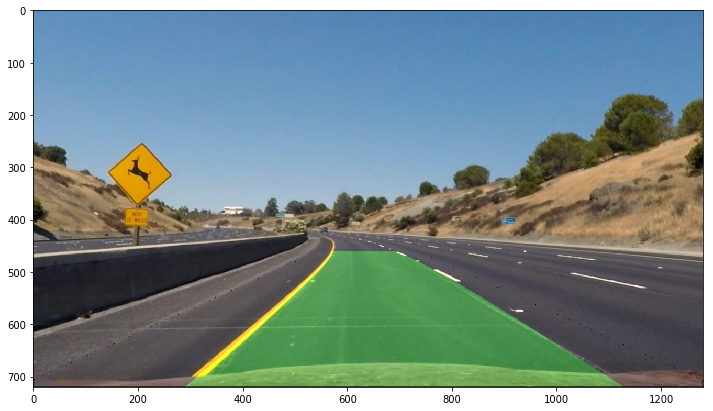

In [100]:
reload( p )

out_img, _, _,_ = p.pipeline_on_bgr_img( frame_t1, params, fits=None, fitxs=None, draw="lane")

u.show( out_img )

In [105]:
params = {
    "cam_mtx" : mtx, 
    "cam_dist" : dist, 
    "persp_M"  : M,
    "persp_M_inv"   : np.linalg.inv( M ),
    "window_width"  : 50, 
    "window_height" : 80, 
    "margin"        : 50,
    # "xm_per_pix"    : 3.7 / 700,
    "ym_per_pix"    : 30 / 720, 
    "out_size_wh"   : (640, 360),
    "sane_update_threshold" : 80,
}

reload( p )

p.pipeline_on_video( in_video_path  = VIDEOS_DIR + "Project_video.mp4",
                     out_video_path = VIDEOS_DIR + "Project_video_lanes_identified_test.avi",
                     params = params,
                     start_frame = 0, end_frame=1500 ) 


Writing video to: C:\_DATA\autonomous-driving-nd\Adv_Lane_finding\\Project_video_lanes_identified_test.avi
frame 0 : error: failed curvature test: 756.8 2818.5668724441416  
frame: 10  upd_l = True upd_r = True
frame: 20  upd_l = True upd_r = True
frame: 30  upd_l = True upd_r = True
frame: 40  upd_l = True upd_r = True
frame: 50  upd_l = True upd_r = True
frame: 60  upd_l = True upd_r = True
frame: 70  upd_l = True upd_r = True
frame: 80  upd_l = True upd_r = True
frame: 90  upd_l = True upd_r = True
frame: 100  upd_l = True upd_r = True
frame: 110  upd_l = True upd_r = True
frame: 120  upd_l = True upd_r = True
frame: 130  upd_l = True upd_r = True
frame: 140  upd_l = True upd_r = True
frame: 150  upd_l = True upd_r = True
frame: 160  upd_l = True upd_r = True
frame: 170  upd_l = True upd_r = True
frame: 180  upd_l = True upd_r = True
frame: 190  upd_l = True upd_r = True
frame: 200  upd_l = True upd_r = True
frame: 210  upd_l = True upd_r = True
frame: 220  upd_l = True upd_r = True

In [112]:
reload( p )
p.pipeline_on_video( in_video_path  = VIDEOS_DIR + "challenge_video.mp4",
                     out_video_path = VIDEOS_DIR + "challenge_video_lanes.avi",
                     params = params,  start_frame = 0, end_frame=1500 ) 

Writing video to: C:\_DATA\autonomous-driving-nd\Adv_Lane_finding\\challenge_video_lanes.avi
0 frames written in 56.34 seconds 0.00 fps ) r_curve_m = 3627.27 mmm


In [ ]:
u.show( img )

In [ ]:
help( cv2.warpPerspective )

In [114]:
reload( p )
p.pipeline_on_video( in_video_path  = VIDEOS_DIR + "harder_challenge_video.mp4",
                     out_video_path = VIDEOS_DIR + "harder_challenge_video_lanes.avi",
                     params = params,  start_frame = 0, end_frame=1500 ) 

Writing video to: C:\_DATA\autonomous-driving-nd\Adv_Lane_finding\\harder_challenge_video_lanes.avi
1195 frames written in 146.61 seconds 8.15 fps ) urve_m = 14.96 mmm
